# Ridge Regression
Ridge regression places a penalty on the size of coefficients in an effort to address the issues with Ordinary Least Square (OLS).

$ \underset{w}{min}\left\| Xw - y\right\|_2^{2} + alpha\left\|w\right\|_2^{2}$

* alpha parameter controls the amount of shrinkage, alpha increases leads to shrinkage of coefficients. This leads to more robustness in collinearity.
* Performs L2 regularization, meaning adding the squared of the magnitudes.

### Let's explore the $alpha$ parameter 

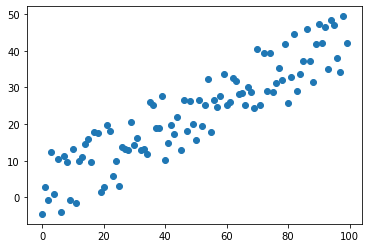

In [9]:
# Generate sample data for Linear regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = np.arange(100)
delta = np.random.uniform(-10,10, size=(100,))
y = .4 * X +3 + delta
plt.scatter(X,y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training input Shape and Target shape: ", X_train.shape, y_train.shape)
print("Testing input Shape and Target shape : ", X_test.shape,y_test.shape)

Training input Shape and Target shape:  (80,) (80,)
Testing input Shape and Target shape :  (20,) (20,)


In [11]:
X_train = np.expand_dims(X_train, 1)
X_test = np.expand_dims(X_test, 1)
print(X_train.shape, X_test.shape)



(80, 1) (20, 1)


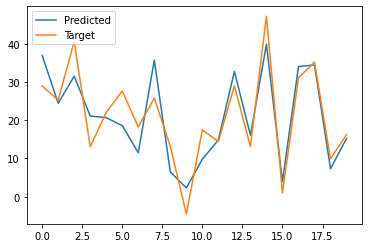

In [38]:
ord_base = linear_model.Ridge(alpha=0)
ord_base.fit(X_train,y_train)
y_pred = ord_base.predict(X_test)
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['Predicted', 'Target'], loc='upper left')

## Exploring different alpha values

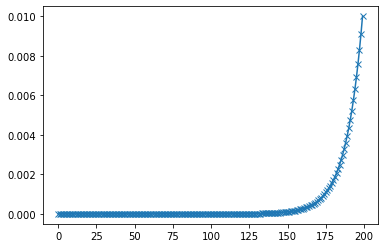

In [17]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
plt.plot(alphas, marker="x")

In [39]:
coeffs = []
pretrained_models = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train,y_train) 
    coeffs.append(ridge.coef_)
    pretrained_models.append(ridge)

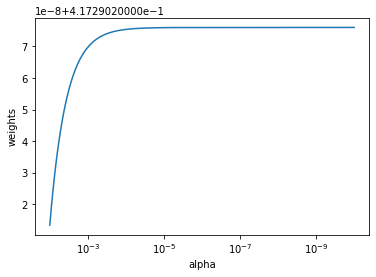

In [40]:
ax = plt.gca()
ax.plot(alphas, coeffs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
# plt.title("Ridge coefficients as a function of the regularization")
# plt.axis("tight")
plt.show()